# 数据获取

In [1]:
import pandas_datareader as pdr
alibaba = pdr.get_data_yahoo('BABA')

In [2]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-13,79.720001,78.500000,78.739998,79.639999,14150900,79.639999
2016-04-14,79.858002,78.360001,79.309998,79.610001,12611500,79.610001
2016-04-15,79.750000,78.459999,79.449997,78.970001,11709100,78.970001
2016-04-18,79.120003,77.709999,78.519997,79.010002,7767000,79.010002
2016-04-19,80.480003,78.470001,79.199997,79.459999,14742000,79.459999


In [3]:
alibaba.shape

(1258, 6)

In [4]:
alibaba.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,232.000000,225.740005,226.029999,230.570007,18100400,230.570007
2021-04-07,228.190002,224.800003,226.110001,225.419998,18034900,225.419998
2021-04-08,229.419998,226.619995,228.500000,228.240005,12211300,228.240005
2021-04-09,225.070007,221.320007,224.850006,223.309998,19746300,223.309998
2021-04-12,244.910004,236.649994,237.889999,244.009995,54625888,244.009995


In [5]:
alibaba.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-04-13 to 2021-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


# 历史趋势分析

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
start = datetime(2015,9,20)
alibaba = pdr.get_data_yahoo('BABA', start=start)
amazon = pdr.get_data_yahoo('AMZN', start=start)

In [10]:
alibaba.to_csv('D:/code/python/bigdata/homework/ali.csv')
amazon.to_csv('D:/code/python/bigdata/homework/amazon.csv')

<AxesSubplot:xlabel='Date'>

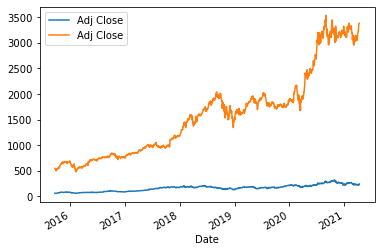

In [13]:
alibaba['Adj Close'].plot(legend=True)
amazon['Adj Close'].plot(legend=True)

In [16]:
# daily return
alibaba['daily-return'] = alibaba['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

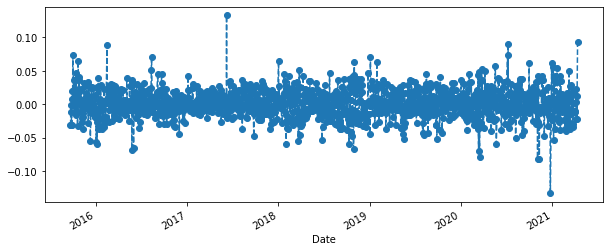

In [20]:
alibaba['daily-return'].plot(figsize=(10,4),linestyle='--',marker='o')

# 风险分析

In [27]:
start = datetime(2017,1,1)
company = ['AAPL','GOOG','MSFT','AMZN','FB']
top_tech_df = pdr.get_data_yahoo(company,start=start)['Adj Close']

In [28]:
top_tech_dr = top_tech_df.pct_change()

In [29]:
top_tech_dr

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.000967,-0.004474,0.004657,0.015660
2017-01-05,0.005085,0.009048,0.000000,0.030732,0.016682
2017-01-06,0.011148,0.015277,0.008668,0.019912,0.022707
2017-01-09,0.009160,0.000620,-0.003183,0.001168,0.012074
...,...,...,...,...,...
2021-04-06,0.002462,-0.000359,-0.004858,-0.000902,-0.008579
2021-04-07,0.013390,0.011206,0.008230,0.017237,0.022301
2021-04-08,0.019234,0.007005,0.013405,0.006071,-0.000224


<AxesSubplot:xlabel='Date'>

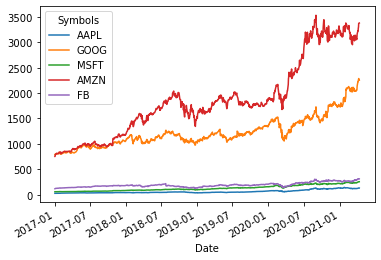

In [30]:
top_tech_df.plot()

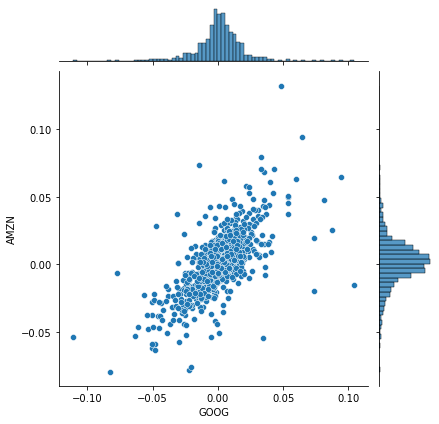

In [34]:
sns.jointplot('GOOG','AMZN',top_tech_dr,kind='scatter') # 查看股票相关性

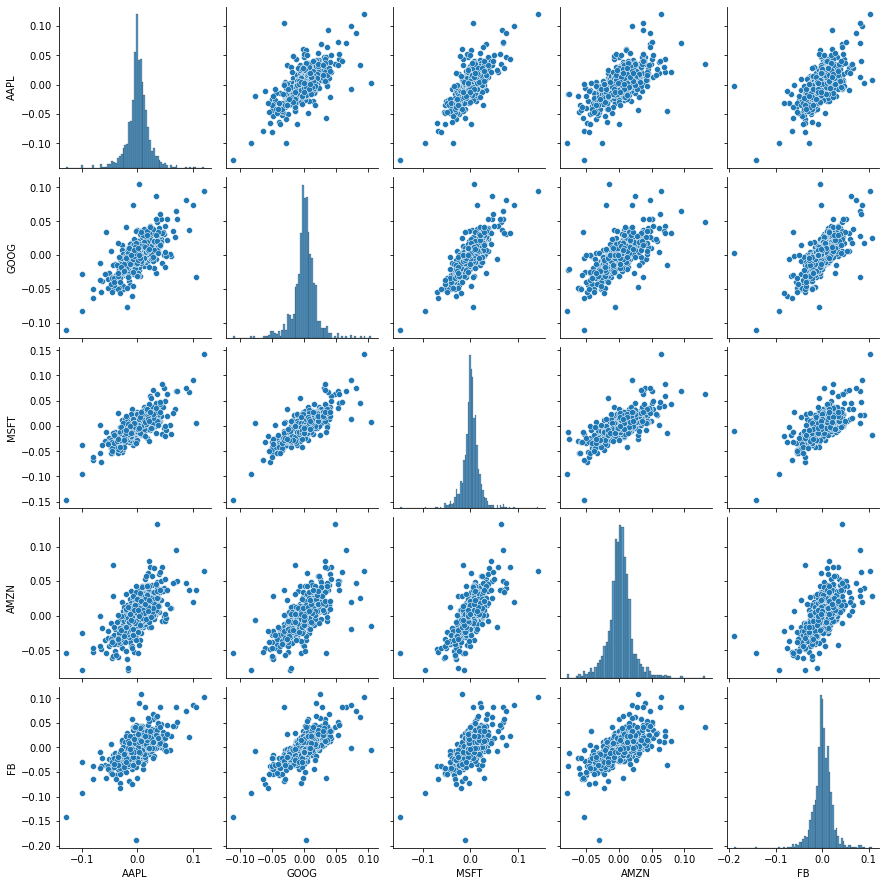

In [35]:
sns.pairplot(top_tech_dr.dropna())

In [36]:
top_tech_dr['AAPL'].quantile(0.52)

0.0018334743428574647